# AI Community @ IU Boot Camp 2017
## Воркшоп по анализу данных

Привет. Начнем с азов.

### Jupyter / Python / numpy / scipy
Один из класических наборов ПО для анализа.
#### Jupyter
Jupyter представляет собой веб-интерфейс для исполнения кода в тетрадях \ ноубуках (notebook). Тетрадь делится на ячейки двух видов: ячейки с текстом (Markdown) и ячейки с кодом. Конкретно эта ячейка — Markdown, в ней можно писать текст, в том числе страшные формулы ($\LaTeX$):

$$\frac{\partial g}{\partial X} = \frac{\partial f}{\partial X} + \left(\frac{\partial f}{\partial X}\right)^T -
\mathrm{diag}\left(\frac{\partial f}{\partial x_{11}}, \frac{\partial f}{\partial x_{22}},\ldots,
\frac{\partial f}{\partial x_{nn}}\right)$$

Можно вставлять <strike>мемы</strike> картинки:

<img src='https://pp.userapi.com/c637227/v637227487/5d6d2/spUnGgKfQdA.jpg' width="500" />

Можно вставлять сниппеты с кодом (без возможности выполнить):

```python
import antigravity
```

Другой вид ячеек: ячейки с кодом. Каждую ячейку можно выполнять по отдельности. Во время выполнения ячейки под ней пишется весь вывод на стандартный поток (все `print`); после выполнения — результат (значение, которое возвращается последним выражением).

In [1]:
# Блок с кодом на Python
print("Hello Jupyter!")
print("Another line: {}".format(2 + 2))
"This string is lost — it is not in the end."
"This string is the result of the cell."

Hello Jupyter!
Another line: 4


'This string is the result of the cell.'

Помимо кода, в блоке могут быть специфические для Jupyter вещи:
* `%magic` команды — дополнительное поведение, например можно замерить время выполнения ячейки

In [2]:
%%timeit

for _ in range(300):
    for _ in range(300):
        2 + 3 + 5 + 7

2.53 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


* `!system` команды — вызовы к программам из командной строки

In [153]:
!curl http://wttr.in/Kazan

curl: (56) Recv failure: Connection reset by peer


Важные сочетания клавиш:
* Tab: автодополнение
* Shift+Tab: подсказка; Shift+Tab, держа Shift нажать Tab еще раз: закрепленная подсказка
* Ctrl+S: сохранить ноутбук
* Esc: выход из режима ввода текста в ячейку, после этого при помощи стрелок можно выбрать другую ячейку
* Shift+Enter: выполнение текущей ячейки + переключение фокуса на следующую существующую
* Alt+Enter: выполнение текущей ячейки + создание новой чистой ячейки снизу + переключение фокуса на нее

Другие команды доступны по Esc+H.

В целом, Jupyter поддерживает и другие языки (как минимум: Jupyter = **Ju**lia + **Pyt**hon + **R**), но остановимся на Python.

### Python
Python является, пожалуй, самым популярным языком, особенно для начинающих. Он настолько прост, что обычно псевдокод один в один переписывается на него. Обратимся к философии языка.

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


После импорта библиотеки обычно текст не пишется, `import this` это исключение из правил.

Хорошим тоном считается в начале ноутбуков писать используемые библиотеки. Сделаем так же, хоть и потребуются они позже.

In [329]:
# Библиотека для работы с матрицами
import numpy as np 

# Алгоритмы линейной алгебры
import scipy.linalg as sla

# Библиотека для работы с разреженными матрицами
import scipy.sparse as sps

# Алгоритмы линейной алгебры для разреженных матриц
import scipy.sparse.linalg as spla

# Графическая библиотека
import matplotlib.pyplot as plt

# Позволяет отрисовывать графики и изображения прямо в ноутбуке, а не в отдельном окне. Жизненно важная вещь!
%matplotlib inline

# Изменим стандартный размер графиков
plt.rcParams['figure.figsize'] = (12.0, 7.0)

Сейчас начнем краткую экскурсию в Мир Питона.

In [330]:
integer = 10 ** 2            # 10 в квадрате
fractional = round(np.pi, 5) # 5 знаков после запятой числа пи
matrix = np.eye(N=3, M=3)    # единичная матрица 3x3
boolean = True or False

In [331]:
# Tuple — immutable list with a fixed length
variables = (integer, fractional, boolean, matrix)
variables

(100, 3.14159, True, array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]]))

Хоть тип и не был указан, у каждой переменной выше он есть — он выводится из присвоенного значения.

In [332]:
for type_string in [type(variable) for variable in variables]: # list comprehension
    print(type_string)                                         # создает новый список применяя функцию ко всем элементам
print(type(variables))                                         # аналогично [type(integer), type(factional), ...] 

<class 'int'>
<class 'float'>
<class 'bool'>
<class 'numpy.ndarray'>
<class 'tuple'>


In [333]:
numpy_unsigned_integer = np.uint8(fractional) # Типы можно приводить друг к другу — приведем float к np.uint8
print(numpy_unsigned_integer)
print(type(numpy_unsigned_integer))
three_minus_four = numpy_unsigned_integer - np.uint64(4)
print(three_minus_four) # левое слагаемое больше правого, оба беззнаковые — происходит переполнение
uint64_maxvalue = np.iinfo(np.uint64).max
print("Overflow is happened: {}".format(three_minus_four == uint64_maxvalue))

3
<class 'numpy.uint8'>
18446744073709551615
Overflow is happened: True


In [334]:
# Булева арифметика
True and False, not False, True or False

(False, True, True)

In [335]:
# Два типа деления: дробное и целочисленное
5 / 2, 5 // 2

(2.5, 2)

In [336]:
# Сравнение значений
2 > 1, 2 < 1, 2 >= 2, 2 <= 2, 1 == 0, True == False

(True, False, True, True, False, False)

In [337]:
# Строки и индексация
string = "" + \
"""Humpty Dumpty sat on a wall,
Humpty Dumpty had a great fall;
All the king's horses and all the king's men
Couldn't put Humpty together again."""
print(string); print()

prefix_substring = string[:6] # шесть символов — с нулевого по пятый; второй конец не включается в интервал [0, 6)
print("Prefix:", prefix_substring); print()

rubbish = string[94:42:-1] # третье значение задает порядок перебора, -1: обратном порядке
print(rubbish); print()

encoded_message = string[::5]
print(encoded_message); print()

print("By order: fractional={1}, boolean={0}".format(boolean, fractional))
print("By key: fractional={fractional}, boolean={boolean}".format(
     boolean=boolean, fractional=fractional
))

print(list(prefix_substring))

Humpty Dumpty sat on a wall,
Humpty Dumpty had a great fall;
All the king's horses and all the king's men
Couldn't put Humpty together again.

Prefix: Humpty

 eht lla dna sesroh s'gnik eht llA
;llaf taerg a dah

Hypa lu tdrf
ti ed ks
dpu ta.

By order: fractional=3.14159, boolean=True
By key: fractional=3.14159, boolean=True
['H', 'u', 'm', 'p', 't', 'y']


In [338]:
numbers_list = [1, 4, 2, 3, 2, 0, 5, 32]
print(numbers_list)
numbers_list.sort() # сортировка меняет исходный список
print("Sorted:", numbers_list)
numbers_list.append(322) # аналогично
print("Appended:", numbers_list)

odd_squares = [np.square(number) for number in numbers_list if number % 2 == 1]
print(odd_squares)

[1, 4, 2, 3, 2, 0, 5, 32]
Sorted: [0, 1, 2, 2, 3, 4, 5, 32]
Appended: [0, 1, 2, 2, 3, 4, 5, 32, 322]
[1, 9, 25]


In [339]:
# Кортежи
x, y, z = (4, 5, 6) # pattern matching
print(x, y, z)

4 5 6


In [340]:
# Словари
from_tuples = dict([('a', 1), ('b', 2), ('c', 3)])
print(from_tuples)

from_dict_comprehension = {
    char: index for index, char in enumerate(prefix_substring)
}

for key, value in from_dict_comprehension.items():
    print(key, ":", value)
    
print('Z' in from_dict_comprehension) # from_dict_comprehension == from_dict_comprehension.keys()

{'a': 1, 'b': 2, 'c': 3}
H : 0
u : 1
m : 2
p : 3
t : 4
y : 5
False


In [341]:
# Функции
def get_something(a, b, c=5):
    return a + b + c

get_something(10, 20) == 35

True

In [342]:
def do_something(a, b):
    pass

do_something(1, 2) == None

True

Источник:
* https://github.com/yandexdataschool/MLatImperial2017/blob/master/0-intro-to-python.ipynb


#### numpy
Библиотека для численных вычислений.

In [343]:
indices = np.arange(10)
print(indices)
print(indices.reshape((5, 2)))

[0 1 2 3 4 5 6 7 8 9]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [344]:
# Все операции numpy являются поэлементными:
print(np.exp(indices))

[  1.00000000e+00   2.71828183e+00   7.38905610e+00   2.00855369e+01
   5.45981500e+01   1.48413159e+02   4.03428793e+02   1.09663316e+03
   2.98095799e+03   8.10308393e+03]


Shape: (100000,)
Min: 7.63688397076e-07 , max: 0.999972416082


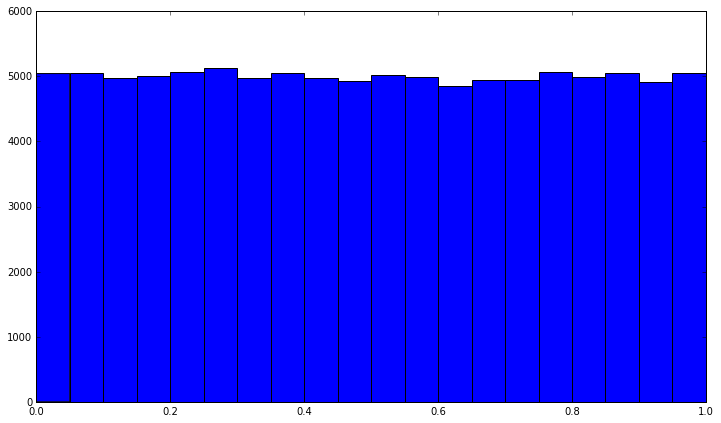

In [345]:
vector = np.random.random(size=100000)
print("Shape:", vector.shape)
_ = plt.hist(vector, bins=20)
print("Min:", vector.min(), ", max:", np.max(vector))

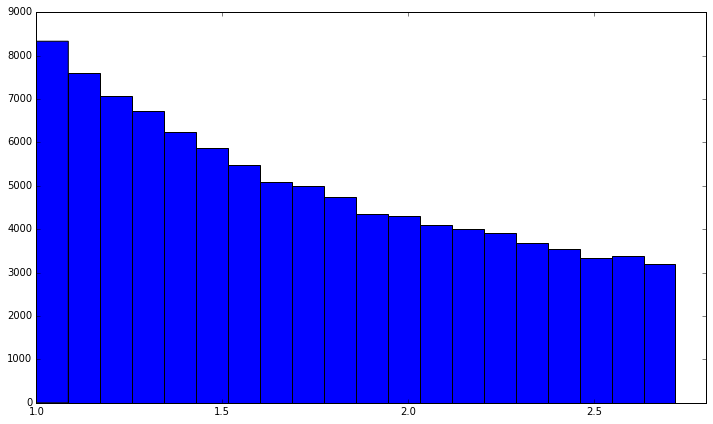

In [346]:
_ = plt.hist(np.exp(vector), bins=20)

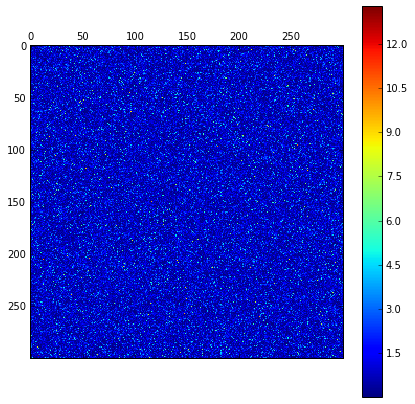

In [350]:
# Красивые графики
matsize = 300
matrix = np.random.exponential(size=(matsize, matsize))
_ = plt.matshow(matrix)
_ = plt.colorbar()

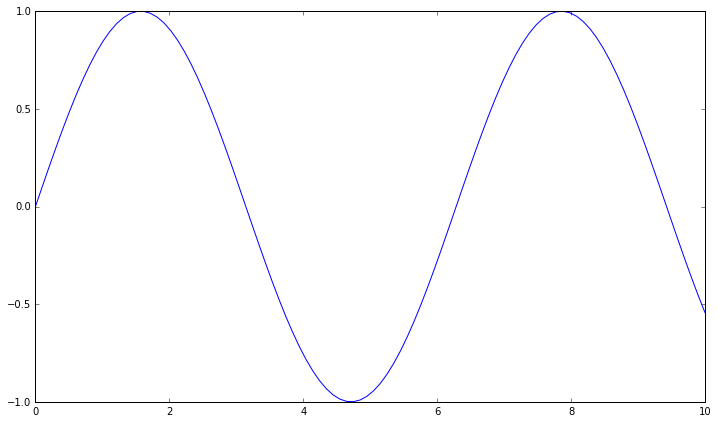

In [352]:
x = np.linspace(0, 10, num=100)
_ = plt.plot(x, np.sin(x))

Источник:
* https://github.com/yandexdataschool/MLatImperial2017/blob/master/1.1-introduction-to-numpy.ipynb